# Emotion API Python Quick Start

> [!IMPORTANT]
> Video API Preview will end on October 30th, 2017. Try the new [Video Indexer API Preview](https://azure.microsoft.com/services/cognitive-services/video-indexer/) to easily extract insights from 
videos and to enhance content discovery experiences, such as search results, by detecting spoken words, faces, characters, and emotions. [Learn more](https://docs.microsoft.com/azure/cognitive-services/video-indexer/video-indexer-overview).

This walkthrough provides information and code samples to help you quickly get started using the [Emotion API Recognize method](https://westus.dev.cognitive.microsoft.com/docs/services/5639d931ca73072154c1ce89/operations/563b31ea778daf121cc3a5fa) with Python to recognize the emotions expressed by one or more people in an image. 

You can run this example as a Jupyter notebook on [MyBinder](https://mybinder.org) by clicking on the launch Binder badge: 
[![Binder](https://mybinder.org/badge.svg)](https://mybinder.org/v2/gh/Microsoft/cognitive-services-notebooks/master?filepath=EmotionAPI.ipynb)


## Prerequisite
Get your free Subscription Key [here](https://azure.microsoft.com/en-us/try/cognitive-services/)

## Running the walkthrough
Please replace `subscription_key` below with the API key you obtained earlier.

In [20]:
subscription_key = None
assert subscription_key

Also, please verify that the URL below corresponds to the region you used when setting up the API key. If you are using a trial key, you are good to go!

In [21]:
emotion_recognition_url = "https://westus.api.cognitive.microsoft.com/emotion/v1.0/recognize"

In the emotion API walktrough, we will be using images that are stored on disk. You can also use images that are available via a publically-accessible URL. For more details, please see the [REST API](https://westus.dev.cognitive.microsoft.com/docs/services/5639d931ca73072154c1ce89/operations/563b31ea778daf121cc3a5fa) documentation.

Since the image data is passed as part of the request body, notice that we need to set the `Content-Type` header to `application/octet-stream`. If you are passing in an image via a URL, remember to set the header to:
```python
header = {'Ocp-Apim-Subscription-Key': subscription_key }
```
create a dictionary containing the URL:
```python
data = {'url': image_url}
```
and pass that to the `requests` library using:
```python
requests.post(emotion_recognition_url, headers=headers, json=image_data)
```

First download a few sample images from the [Emotion API](https://azure.microsoft.com/en-us/services/cognitive-services/emotion/) site.

In [22]:
%%bash
mkdir -p images
curl -Ls https://aka.ms/csnb-emotion-1 -o images/emotion_1.jpg
curl -Ls https://aka.ms/csnb-emotion-2 -o images/emotion_2.jpg

In [23]:
image_path = "images/emotion_1.jpg"
image_data = open(image_path, "rb").read()

In [24]:
import requests
headers  = {'Ocp-Apim-Subscription-Key': subscription_key, "Content-Type": "application/octet-stream" }
response = requests.post(emotion_recognition_url, headers=headers, data=image_data)
response.raise_for_status()
analysis = response.json()
analysis

[{'faceRectangle': {'height': 162, 'left': 130, 'top': 141, 'width': 162},
  'scores': {'anger': 9.29041e-06,
   'contempt': 0.000118981574,
   'disgust': 3.15619363e-05,
   'fear': 0.000589638,
   'happiness': 0.06630674,
   'neutral': 0.00555004273,
   'sadness': 7.44669524e-06,
   'surprise': 0.9273863}}]

The returned JSON object contains the bounding boxes of the faces that were recognized along with the detected emotions. Each emotion is associated with a score between $0$ and $1$ where a higher score is more indicative of an emotion than a lower score. 

We can now overlay the emotions on the faces in the image using `matplotlib` as shown below. To reduce clutter, we only show the top three emotions detected.

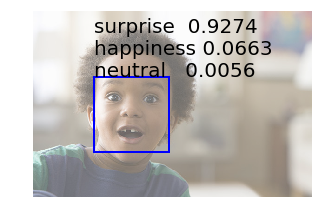

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from io import BytesIO
from PIL import Image

plt.figure(figsize=(5,5))

image  = Image.open(BytesIO(image_data))
ax     = plt.imshow(image, alpha=0.6)

for face in analysis:
    fr = face["faceRectangle"]
    em = face["scores"]
    origin = (fr["left"], fr["top"])
    p = Rectangle(origin, fr["width"], fr["height"], fill=False, linewidth=2, color='b')
    ax.axes.add_patch(p)
    ct = "\n".join(["{0:<10s}{1:>.4f}".format(k,v) for k, v in sorted(list(em.items()),key=lambda r: r[1], reverse=True)][:3])
    plt.text(origin[0], origin[1], ct, fontsize=20)    
_ = plt.axis("off")

We can now generalize the function to overlay emotions on top of an image file given its path on the file system via the following function:

In [26]:
def annotate_image(image_path):    
    image_data = open(image_path, "rb").read()
    headers  = {'Ocp-Apim-Subscription-Key': subscription_key, "Content-Type": "application/octet-stream" }
    response = requests.post(emotion_recognition_url, headers=headers, data=image_data)
    response.raise_for_status()
    analysis = response.json()

    plt.figure()

    image  = Image.open(image_path)
    ax     = plt.imshow(image, alpha=0.6)

    for face in analysis:
        fr = face["faceRectangle"]
        em = face["scores"]
        origin = (fr["left"], fr["top"])
        p = Rectangle(origin, fr["width"], fr["height"], fill=False, linewidth=2, color='b')
        ax.axes.add_patch(p)
        ct = "\n".join(["{0:<10s}{1:>.4f}".format(k,v) for k, v in sorted(list(em.items()),key=lambda r: r[1], reverse=True)][:3])
        plt.text(origin[0], origin[1], ct, fontsize=20, va="bottom")    
    _ = plt.axis("off")

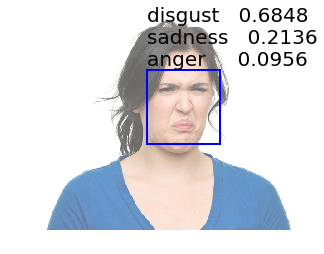

In [27]:
annotate_image("images/emotion_2.jpg")